<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/SVD_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.2125, 0.7154, 0.0721])


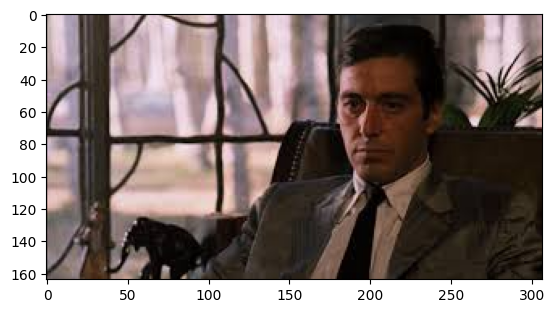

In [3]:
img = mpimg.imread('mc.png',0)
imgplot = plt.imshow(img)

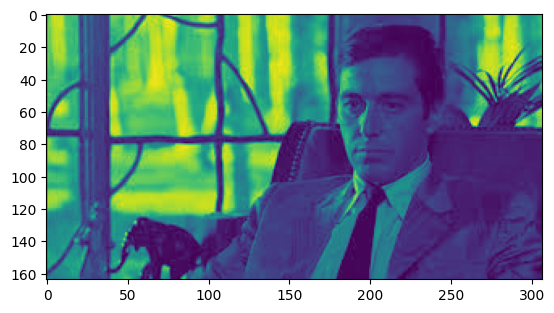

In [4]:
gray = rgb2gray(img)
imgplot = plt.imshow(gray)

In [5]:
print('Original', img.shape)
print('PB', gray.shape)

Original (164, 307, 3)
PB (164, 307)


In [6]:
u, s, v = np.linalg.svd(gray, full_matrices=False)


In [7]:
print('Check', np.allclose(gray, np.dot(u * s, v[:u.shape[0],:])))

Check True


In [8]:
print ('Shape U->', u.shape)
print ('Shape S->', s.shape)
print ('Shape V->', v.shape)

Shape U-> (164, 164)
Shape S-> (164,)
Shape V-> (164, 307)


In [9]:
def reduction(threesold = 0.8):
    energy = 0
    energy_total = np.sum(s)
    for i in range(0,s.shape[0]):
        energy += s[i]
        if energy / energy_total >= threesold:
            return i

In [10]:
sizes =  [0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.99999999999]
redux = []

for z in sizes:
    redux.append(reduction(z))


In [11]:
for i in range(0,len(redux)):
    print('Proportion:', sizes[i], 'SV:' , redux[i])


Proportion: 0.4 SV: 2
Proportion: 0.5 SV: 5
Proportion: 0.6 SV: 10
Proportion: 0.7 SV: 19
Proportion: 0.75 SV: 24
Proportion: 0.8 SV: 32
Proportion: 0.85 SV: 41
Proportion: 0.9 SV: 55
Proportion: 0.95 SV: 79
Proportion: 0.99 SV: 119
Proportion: 0.99999999999 SV: 163


In [12]:
recimg = []
svds = []
for e in redux:
    ss = np.concatenate((s[:e], np.zeros(s.shape[0] - e)))
    svds.append(ss)
    recimg.append(np.dot(u * ss, v))

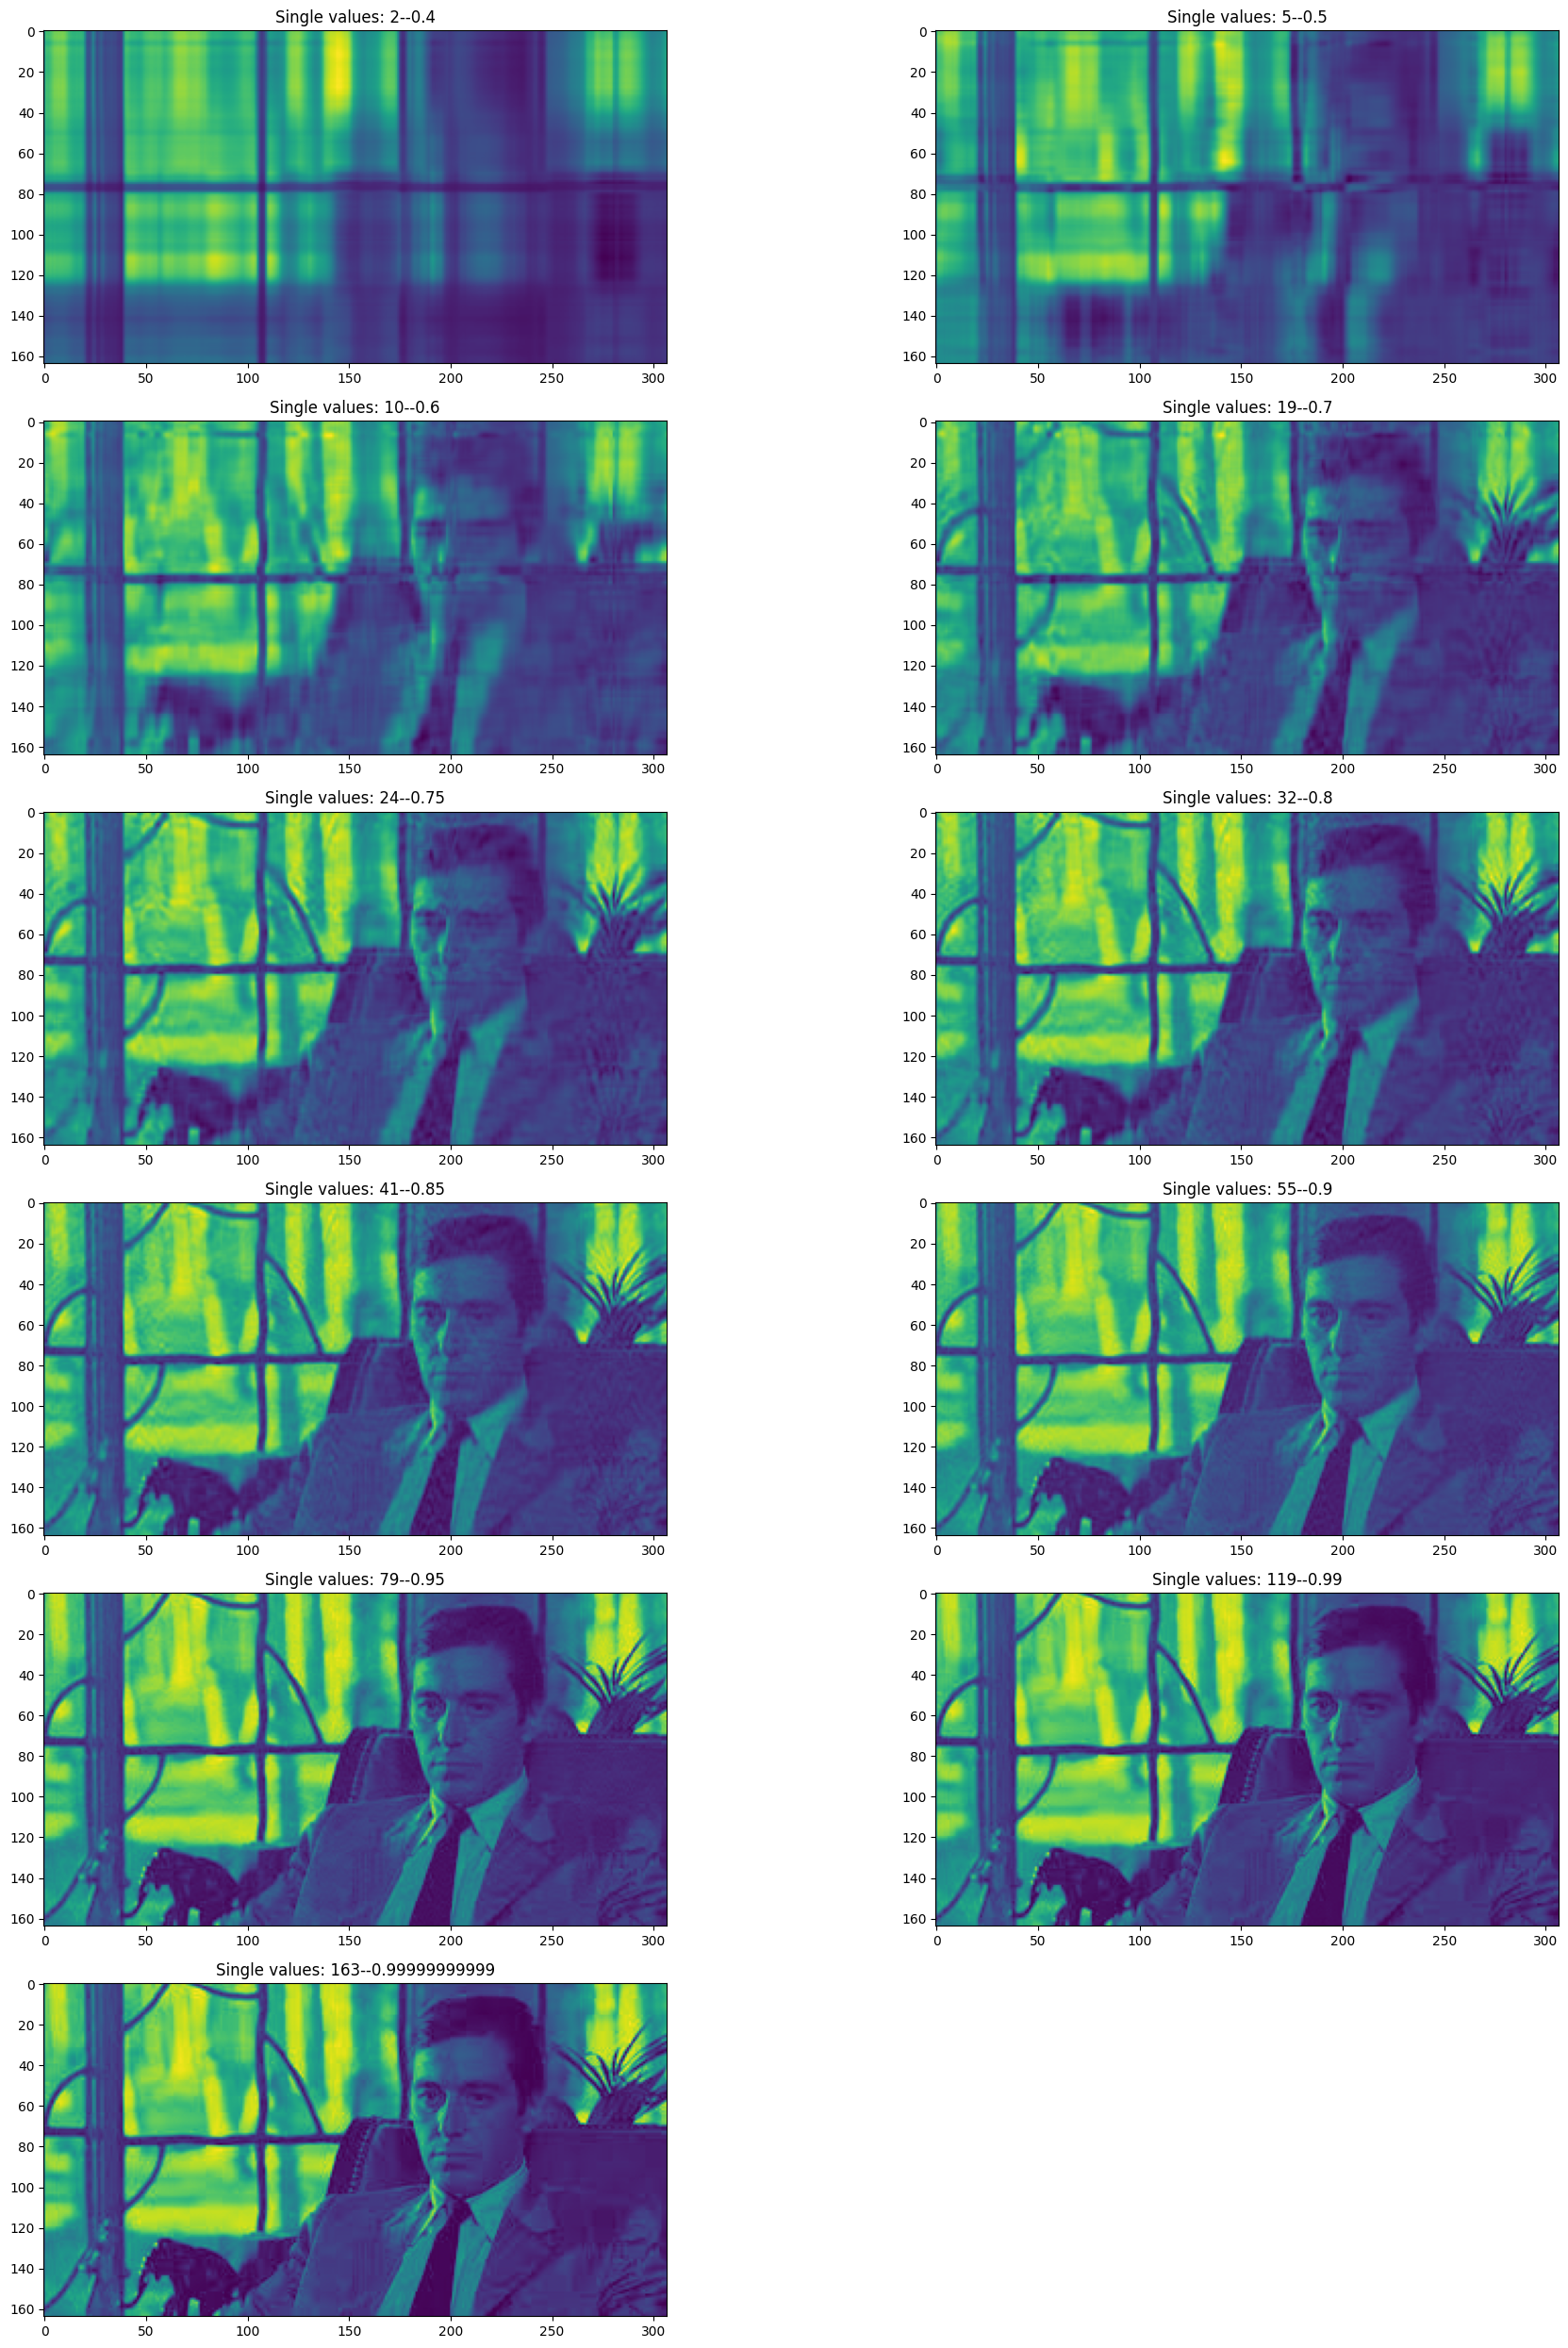

In [13]:
fig=plt.figure(figsize=(20, 25))
columns = 2
rows = int(len(recimg) / columns) + 1
for j in range(0, len(recimg)):
    f = fig.add_subplot(rows, columns, j+1)
    f.title.set_text('Single values: ' + str(redux[j]) + '--' +  str(sizes[j]))
    plt.imshow(recimg[j])
plt.tight_layout()
plt.show()

In [14]:
svds[4]

array([23493.66491008,  5807.28532699,  3720.57501021,  2788.73002858,
        2174.41231706,  1916.61961926,  1793.71830414,  1566.55982516,
        1512.32076365,  1225.6073036 ,  1173.88640306,  1066.44974537,
         987.67735073,   937.29953768,   914.65635473,   903.83421081,
         862.75285676,   843.28769315,   832.12261858,   798.17608553,
         766.13124536,   746.0580323 ,   704.46586249,   679.58853583,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      